# Zadanie rekrutascyjne - Data Scientist - 3Soft

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from utilities.utl_data import check_inactive, filling_data

## Zadanie 0. Sprawdzenie i przygotowanie danych

In [7]:
df_descriptive = pd.read_csv('data/descriptive.csv', sep=';', decimal=',', index_col='id')
df_signal = pd.read_csv('data/signal.csv', sep=';', index_col='id')
df_time = pd.read_csv('data/time.csv', sep=';', index_col='id')

df_descriptive['y'] = df_signal['y']

#### Plik `descriptive.csv`
Wstępna analiza cech została wykonana przy pomocy EDA - Pandas Profiling. Całość odpala się w aplikacji webowej na mechaniźmie biblioteki `Streamlit`. 

Aby odpalić raport należy stworzyć wirtualne środowisco `venv` oraz zaimportować wszystkie biblioteki z pliku `requirements.txt`.

W konsoli przy aktywnym nowym środowisku komenda:
- `streamlit run raport_descriptive_before.py` - prezentuje EDA przed przerobieniem
- `streamlit run raport_descriptive_after.py` - prezentuje EDA po przerobieniem

**Wykonane naprawy:**
- usunięto zmienne `x1`, `x_34` oraz `x_44` <-- wartość stała we wszystkich wierszach
- należy przyjrzeć się, dlaczego między zmiennymi jest tak duża korelacja
- Żadna z cech głównych nie jest bezpoścrednio skorelowana z naszym sygnałem, jednakże cechy są skorelowane między sobą. Należałoby dokładniej przebadać całe zagadnienie od stroby biznesowej, dlaczego tak się dzieje.
- W 44 zmiennych występują brakujące wartości. Drzewa decyzyjne (takie jak C4.5 czy CART) są pierwszymi algorytmami, które uwzględniają obsługę brakujących danych w samym algorytmie. Jednakże funkcja zaimprementowana w Pythonie (w bibliotece `sklearn`) nie są do tego przystosowane, dlatego powinniśmy to wykonać w naszym zakresie. Mamy do czynienia z danymi dotyczącymi sygnału (dane zależne w czasie) oraz wiemy, że są to dane numeryczne (lub w niektórych przypadkuach można podejrzewać występowanie danych kategorycznych). Możemy wykorzystać tutaj 3 podejścia na uzupełnienie tych danych:
    - wykorzystać fakt, że jest to szereg czasowy i uzupełnić wartości brakujące ostatnią zarejestrowaną daną;
    - znaleźć inną zmienną zależną w danych i na jej podstawie dokonać wypełnienia wartości brakujących;
    - wstawić medianę we wszystkie brakujące miejsca.
    
Na potrzeby tego zadania skorzystam z uzupełnienia danych wartością poprzednią widzianą w danych. W przypadku danych, które od samego początku zbierania danych nie posiadają zawartości to one zostają uzupełnione pierwszą istniejącą wartością.

In [3]:
# Missing data
df_descriptive = filling_data(df_descriptive, df_time)
# Droping unrepresentative variables
df_descriptive = df_descriptive.drop(['x_1', 'x_34', 'x_44'], axis=1)

In [4]:
df_descriptive.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1036 entries, 2003-08-04 to 2006-07-02
Data columns (total 75 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x_2     1036 non-null   float64
 1   x_3     1036 non-null   float64
 2   x_4     1036 non-null   float64
 3   x_5     1036 non-null   float64
 4   x_6     1036 non-null   float64
 5   x_7     1036 non-null   float64
 6   x_8     1036 non-null   float64
 7   x_9     1036 non-null   float64
 8   x_10    1036 non-null   float64
 9   x_11    1036 non-null   float64
 10  x_12    1036 non-null   float64
 11  x_13    1036 non-null   float64
 12  x_14    1036 non-null   float64
 13  x_15    1036 non-null   float64
 14  x_16    1036 non-null   float64
 15  x_17    1036 non-null   float64
 16  x_18    1036 non-null   float64
 17  x_19    1036 non-null   float64
 18  x_20    1036 non-null   float64
 19  x_21    1036 non-null   float64
 20  x_22    1036 non-null   float64
 21  x_23    1036 non-nu

In [5]:
df_descriptive.head(10)

,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,...,x_69,x_70,x_71,x_72,x_73,x_74,x_75,x_76,x_77,x_78
DATE,,,,,,,,,,,,,,,,,,,,,
2003-08-04,0.0,0.0,-6.3,-1.8,-5.5,1.0,6.0,53.0,4.0,12.0,...,0.0,0.0,0.0,-7.10,0.5,0.5,0.27,1.0,0.5,1.0
2003-08-05,0.0,0.0,-8.0,-1.8,-5.8,1.0,7.0,53.0,4.0,2.0,...,0.0,0.0,0.0,-7.10,0.5,0.5,0.27,1.0,0.5,1.0
2003-08-06,0.0,0.0,-7.0,-1.9,-6.1,1.0,1.0,1.0,4.0,2.0,...,0.0,0.0,0.0,-7.47,0.5,0.5,0.27,1.0,0.5,1.0
2003-08-07,0.0,0.0,-7.4,-1.9,-6.3,1.0,2.0,1.0,4.0,2.0,...,0.0,0.0,0.0,-6.57,0.5,0.5,0.27,1.0,0.5,1.0
2003-08-08,0.0,0.0,-5.3,-2.0,-6.3,1.0,3.0,1.0,4.0,2.0,...,0.0,0.0,0.0,-5.90,0.5,0.5,0.27,1.0,0.5,1.0
2003-08-09,0.0,0.0,-5.0,-2.1,-6.1,1.0,4.0,1.0,4.0,12.0,...,0.0,0.0,0.0,-3.23,0.5,0.5,0.27,1.0,0.5,1.0
2003-08-10,0.0,0.0,0.6,-2.1,-5.5,1.0,5.0,1.0,4.0,12.0,...,0.0,0.0,0.0,-0.60,0.5,0.5,0.27,1.0,0.5,1.0
2003-08-11,0.0,0.0,2.6,-2.2,-3.5,1.9,6.0,1.0,4.0,1.0,...,0.0,0.0,0.0,1.47,0.5,0.5,0.27,1.0,0.5,1.0
2003-08-12,0.0,0.0,1.2,-2.2,-2.3,1.3,7.0,1.0,4.0,1.0,...,0.0,0.0,0.0,2.23,0.5,0.5,0.27,1.0,0.5,1.0


In [6]:
df_descriptive.tail(10)

,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,...,x_69,x_70,x_71,x_72,x_73,x_74,x_75,x_76,x_77,x_78
DATE,,,,,,,,,,,,,,,,,,,,,
2006-06-23,0.0,0.0,3.1,7.9,5.9,0.5,3.0,47.0,3.0,1.0,...,3.0,7.0,9.0,2.93,0.69,0.51,0.05,0.12,0.08,0.40
2006-06-24,0.0,1.0,1.7,7.0,4.8,0.4,4.0,47.0,3.0,1.0,...,3.0,0.0,9.0,2.13,0.69,0.51,0.04,0.08,0.29,0.42
2006-06-25,0.0,1.0,1.6,6.3,4.0,0.4,5.0,47.0,3.0,1.0,...,3.0,0.0,9.0,1.80,0.69,0.51,0.11,0.28,0.20,0.39
2006-06-26,0.0,2.0,2.1,5.8,3.5,0.3,6.0,47.0,3.0,1.0,...,3.0,0.0,9.0,2.50,0.69,0.51,0.07,0.19,0.35,0.39
2006-06-27,0.0,1.0,3.8,5.5,3.6,0.4,7.0,47.0,3.0,1.0,...,3.0,0.0,9.0,3.23,0.69,0.51,0.13,0.35,0.00,0.37
2006-06-28,4.0,4.0,3.8,5.3,3.7,0.4,1.0,48.0,3.0,1.0,...,3.0,0.0,9.0,3.87,0.69,0.51,0.00,0.00,0.23,0.40
2006-06-29,4.0,4.0,4.0,5.1,3.7,0.4,2.0,48.0,3.0,1.0,...,3.0,0.0,9.0,3.63,0.69,0.51,0.09,0.19,0.22,0.48
2006-06-30,2.0,2.0,3.1,5.1,3.6,0.4,3.0,48.0,3.0,1.0,...,3.0,0.0,9.0,2.60,0.69,0.51,0.11,0.19,0.22,0.48
2006-07-01,0.0,1.0,0.7,4.3,2.9,0.4,4.0,48.0,3.0,1.0,...,3.0,0.0,9.0,1.90,0.69,0.51,0.12,0.19,0.17,0.64


In [14]:
df_descriptive.to_json('data/descriptive_v2.json')

#### Plik `signal.csv`
Na podstawie otrzymanych danych możemy stwierdzić, że mamy do czynienia z pewnym czujnikiem pomiarowym. Na wykresie liniowym mamy w danych okres, w którym czujnik najprawdopodobniej przestał działać (mowa tutaj o 2 okresach: `2004-09-19 -- 2004-09-26` oraz `2004-11-26 -- 2005-01-25`).

Ponadto mamy jeden dzień (`2005-05-17`) w którym wartość (`10181`) mocno odstaje od pozostałych. Drzewo decyzyjne nie powinno mieć z tym problemu, dlatego tą wartość zostawiamy.

Należy sprawdzić oba przypadki od strony biznesowej, bo jeśli mamy do czynienia z anomalią to takie dane nie powinny trafić do etapu trenowania.

##### Analiza

In [8]:
df_signal.y.unique()

array([10000, 10004, 10002, 10003, 10010, 10007, 10001, 10008, 10006,
       10005, 10009, 10011, 10012, 10014, 10013, 10020, 10015, 10018,
       10181, 10017, 10016, 10019, 10021, 10026, 10025], dtype=int64)

<AxesSubplot:xlabel='id'>

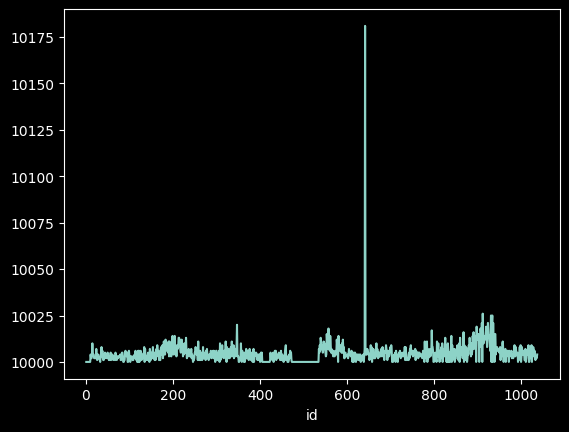

In [9]:
df_signal.y.plot()

In [13]:
suspect_compartments = check_inactive(df_signal.y.values)
suspect_compartments

[[0, 9],
 [85, 86],
 [95, 96],
 [350, 351],
 [404, 421],
 [462, 464],
 [472, 533],
 [702, 704],
 [797, 798],
 [1016, 1017]]